# Introduction 

Spotify is the world’s most popular audio streaming subscription service with 406m users, including 180m subscribers. manage and share over 82 million tracks. Besides, Spotify uses very advanced technology to track and identify each song uploaded to its platform. Spotify Platform provides audio features of tracks to learn about its Mood, Properties and Context. <br>
In this project some of those spotify audio features will be used to analyze and predict the track’s popularity.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import RandomizedSearchCV
import joblib
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.3)

In [3]:
df=pd.read_csv('Spotify.csv',  dtype = {'release_date': str })
df

acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1fUEUd1EW3FcF8AEI   
1            150200   0.517         0  0hbkKFIJm7Z05H8Zl9w30f   
2            163827   0.186         0  11m7laMUgmOKqI3oYzuhne   
3            422087   0.798         0  19Lc5SfJJ5O1oaxY0fpwfh   
4            165224   0.707         1  2hJjbsLCytGsnAHfdsLejp   
...             ...     ...       ...                     ...   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
0               0.000522    5    0.3790   -12.628     0   
1               0.026400    5    0.0809    -7.261     0   
2               0.000018    0    0.5190   -12.098     1   
3               0.801000    2    0.1280    -7.311     1   
4               0.000246   10    0.4020    -6.036     0   
...                  ...  ...       ...       ...   ...   
174384          0.000060    6    0.1780    -5.089     0   
174385          0.000000    4    0.1960   -11.665     1   
174386          0.920000    4    0.1130   -12.393     0   
174387          0.000000    0    0.1130   -12.077     1   
174388          0.891000    7    0.2150   -12.237     1   

                                                     name  popularity  \
0                                Keep A Song In Your Soul          12   
1                                    I Put A Spell On You           7   
2                                            Golfing Papa           4   
3       True House Music - Xavier Santos & Carlos Gomi...          17   
4                                               Xuniverxe           2   
...                                                   ...         ...   
174384                                            The One           0   
174385                                      A Little More           0   
174386                                           Together           0   
174387                                 champagne problems          69   
174388                                     Improvisations           0   

       release_date  speechiness    tempo  valence  year  
0              1920       0.0936  149.976   0.6340  1920  
1        1920-01-05       0.0534   86.889   0.9500  1920  
2              1920       0.1740   97.600   0.6890  1920  
3        1920-01-01       0.0425  127.997   0.0422  1920  
4        1920-10-01       0.0768  122.076   0.2990  1920  
...             ...          ...      ...      ...   ...  
174384   2020-12-25       0.0356  125.972   0.1860  2020  
174385   2021-01-22       0.0360   94.710   0.2280  2021  
174386   2020-12-09       0.0282  108.058   0.7140  2020  
174387   2021-01-07       0.0377  171.319   0.3200  2021  
174388   2020-12-09       0.0258  112.208   0.7470  2020  

[174389 rows x 19 columns]

In [4]:
df.shape

(174389, 19)

In [5]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [6]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [7]:
df.describe(include=[object]) 

artists                      id             name  \
count                         174389                  174389           174389   
unique                         36195                  172230           137013   
top     ['Tadeusz Dolega Mostowicz']  1xQvPFljQXA3GCK869ERvC  White Christmas   
freq                            1281                       9              103   

       release_date  
count        174389  
unique        11043  
top            1945  
freq           1447

# Dataset

The dataset contains over 170k tracks from 1920 to 2021 by different artists. 19 Variables are provided in the dataset to describe the features of each track, the artist name, track name and the popularity of the track

## Features Description


**Numerical**: <br>


1. **valence:** A measure from (0.0 to 1.0) describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

2. **danceability:** Ranges from (0.0 to 1.0) Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.

3. **duration_ms:** The duration of the track in milliseconds.

4. **energy:** Energy is a measure from (0.0 to 1.0) and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

6. **instrumentalness**: Ranges from (0.0 to 1.0) Predicts whether a track contains no vocals. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

7. **Acousticness:** Ranges from (0.0 to 1.0), representing whether the track is acoustic. 1.0 represents high confidence the track is acoustic.(Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means. While all music was once acoustic, the retronym "acoustic music" appeared after the advent of electric instruments, such as the electric guitar, electric violin, electric organ and synthesizer)

9. **liveness:** Ranges from (0.0 to 1.0), Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

10. **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece.

11. **loudness:** The overall loudness of a track in decibels (dB). Values typical range between (-60 and 0 db).

12. **speechiness:** Ranges from (0.0 to 1.0), Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.<br>


**Nominal:**  

1. **artists**: The artist of the song.

2. **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation . C = 0, C#/Db = 1, D = 2, D#/Eb = 3, E =4, F = 5, F#/Gb = 6, G = 7, G#/Ab = 8 ,A = 9, A#/Bb = 10, B =11 <br>

3. **name**: The name of the song

4. **release_date:** The date the album was first released

5. **year:** Year information extracted from release_date.

6. **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

7. **explicit:** The content item is explicit. explicit content is 1, un-explicit is 0. <br>

**Ordinal:** 

1. **popularity:** The popularity of the track. is between (0 and 100), with 100 being the most popular. The popularity is calculated by algorithm and is based on the total number of plays the track has had and how recent those plays are. 


# Feature Engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [10]:
df['release_date']=pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
df[['release_date']].info()
df['release_year']=df['release_date'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   release_date  174389 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


#### The datetime variable type changed from string to datetime and year were extracted

In [11]:
df[df['loudness']>0].shape[0]


35

#### 31 values greater than zero while all values should lie between -60 and 0 db

In [12]:
df['loudness']=df['loudness'].apply(lambda x: x*-1 if x>0 else x)

In [13]:
df[df['loudness']>0].shape[0]

0

In [14]:
df['duration_min']=df['duration_ms']/60000

In [15]:
df['duration_min']

0         2.805550
1         2.503333
2         2.730450
3         7.034783
4         2.753733
            ...   
174384    2.460250
174385    2.412000
174386    3.635783
174387    4.066667
174388    3.295167
Name: duration_min, Length: 174389, dtype: float64

#### The Duration measuring unit changed from millisecond to minutes

In [16]:
def ext_popularity(x):
    if x in range (0,34):
        return 'low popularity'
    elif x in range(34,67):
        return 'medium popularity'
    else:
        return 'high popularity'

In [17]:
df['popularity']=df['popularity'].apply(ext_popularity)

In [18]:
df['popularity'].unique()

array(['low popularity', 'medium popularity', 'high popularity'],
      dtype=object)

#### Popularity variable is categorized 

In [19]:
def ext_decade(x):
    if x in range (1920,1930):
        return "20s"
    elif x in range (1930,1940):
        return "30s"
    elif x in range (1940,1950):
        return "40s"
    elif x in range (1950,1960):
        return "50s"
    elif x in range(1960,1970):
        return "60s"
    elif x in range(1970,1980):
        return "70s"
    elif x in range(1980,1990):
        return "80s"
    elif x in range(1990,2000):
        return"90s"
    elif x in range(2000,2011):
        return "2000-2010"
    else:
        return"2010-2021"

In [20]:
df['decades']=df['release_year'].apply(ext_decade)

In [21]:
def ext_exp(x):
    if x== 1:
        return "explicit"
    else:
        return "un-explicit"

In [22]:
df['explicit']=df['explicit'].apply(ext_exp)

In [23]:
df['explicit'].value_counts()

un-explicit    162507
explicit        11882
Name: explicit, dtype: int64

In [24]:
def ext_mode(x):
    if x== 1:
        return "major"
    else:
        return "minor"

In [25]:
df['mode']=df['mode'].apply(ext_mode)

In [26]:
df['mode'].unique()

array(['minor', 'major'], dtype=object)

#### Decades extracted for visualazition and analysis purpose

In [27]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

       instrumentalness            key       liveness       loudness  \
count     174389.000000  174389.000000  174389.000000  174389.000000   
mean           0.197252       5.205305       0.211123     -11.751256   
std            0.334574       3.518292       0.180493       5.690784   
min            0.000000       0.000000       0.000000     -60.000000   
25%            0.000000       2.000000       0.099200     -14.908000   
50%            0.000524       5.000000       0.138000     -10.836000   
75%            0.252000       8.000000       0.270000      -7.499000   
max            1.000000      11.000000       1.000000      -0.007000   

         speechiness          tempo        valence           year  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean        0.105729     117.006500       0.524533    1977.061764   
std         0.182260      30.254178       0.264477      26.907950   
min         0.000000       0.000000       0.000000    1920.000000   
25%         0.035200      93.931000       0.311000    1955.000000   
50%         0.045500     115.816000       0.536000    1977.000000   
75%         0.076300     135.011000       0.743000    1999.000000   
max         0.971000     243.507000       1.000000    2021.000000   

        release_year   duration_min  
count  174389.000000  174389.000000  
mean     1977.061764       3.880167  
std        26.907950       2.473263  
min      1920.000000       0.082283  
25%      1955.000000       2.768883  
50%      1977.000000       3.429783  
75%      1999.000000       4.428667  
max      2021.000000      88.971700

In [28]:
df.drop(['id','duration_ms','release_date','year'], axis=1 , inplace=True)


#### Drop the un-needed features

# Data Cleaning

### 1- Detect mising values

In [29]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
speechiness         0
tempo               0
valence             0
release_year        0
duration_min        0
decades             0
dtype: int64

 No missing data 

### 2- Detect Dupliactes

In [30]:
df.duplicated().value_counts()

False    169858
True       4531
dtype: int64

4531 values found to be repeated found to be

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.reset_index(drop=True, inplace=True)

df.shape

(169858, 18)


### 3- Detect Outliers

In [33]:
num_cols=['acousticness', 'danceability', 'duration_min', 'energy',
 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence','release_year']
for col in num_cols:
    indx=detect_outliers(df,0,[col])
    print(f'indicies of the outliers in {col} are {len(indx)}')

indicies of the outliers in acousticness are 0
indicies of the outliers in danceability are 117
indicies of the outliers in duration_min are 9778
indicies of the outliers in energy are 0
indicies of the outliers in instrumentalness are 32598
indicies of the outliers in liveness are 12107
indicies of the outliers in loudness are 3174
indicies of the outliers in speechiness are 24107
indicies of the outliers in tempo are 1753
indicies of the outliers in valence are 0
indicies of the outliers in release_year are 0


#### danceability, duration_min, instrumentalness, liveness, loudness, speechiness, and tempo features contain outliers

In [34]:
outliers_cols=['danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','duration_min']    
for col in outliers_cols:
    indx=detect_outliers(df,0,[col])
    df.loc[indx,col]=df[col].median()

# Visualizations

### Percetnage of popular and un-popular tracks

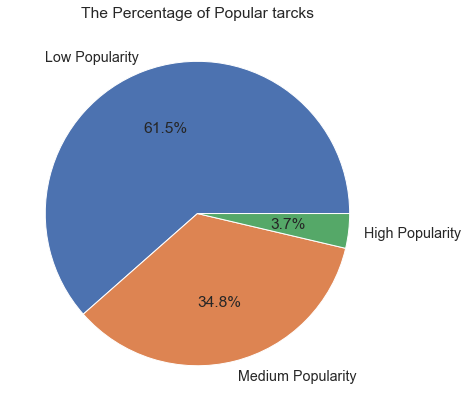

In [35]:
Popularity = [(df['popularity']=='low popularity').sum(),(df['popularity']=='medium popularity').sum(), (df['popularity']=='high popularity').sum() ]
my_labels = 'Low Popularity', 'Medium Popularity', 'High Popularity'
plt.pie(Popularity,labels=my_labels,autopct='%1.1f%%')
plt.title('The Percentage of Popular tarcks')
plt.show()

#### Most of the tracks have low popularity, 62.1% of the tracks are un-popular, while 34.3% of the tracks have medium popularity and 3.6% of the tracks are highly popular

### Percetnage of explicit content in tracks

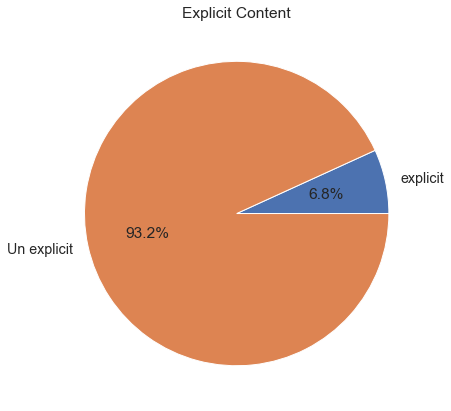

In [36]:
Explicit= [(df['explicit']=='explicit').sum(), (df['explicit']=='un-explicit').sum()]
my_labels = 'explicit', 'Un explicit'
plt.pie(Explicit,labels=my_labels,autopct='%1.1f%%')
plt.title('Explicit Content')
plt.show()

#### The percentage of tracks which have explicit content is 6.8% while the percentage of tracks with un-explicit content 93.2%

### Pecentage of tracks modality

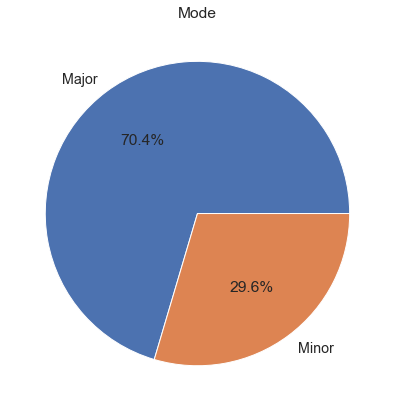

In [37]:
Mode= [(df['mode']=='major').sum(),(df['mode']=='minor').sum()]
my_labels = 'Major', 'Minor'
plt.pie(Mode,labels=my_labels,autopct='%1.1f%%')
plt.title('Mode')
plt.show()

#### 29.8% of the tracks have minor modality while 70.2% have major modality

### Percetnage of keys in tracks

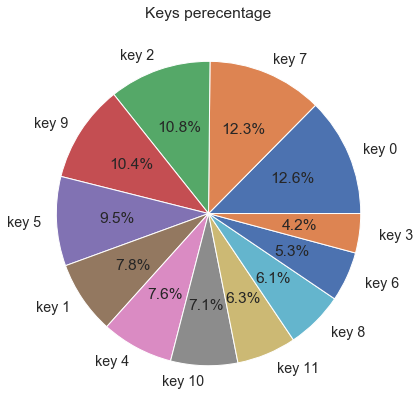

In [38]:
keys = [21967, 21363, 18916, 18109, 16546, 13562, 13327, 12406, 11014, 10673,  9226,  7280]
my_labels=  'key 0', 'key 7', 'key 2', 'key 9', 'key 5', 'key 1', 'key 4', ' key 10', ' key 11', ' key 8', ' key 6', ' key 3'
plt.pie(keys,labels=my_labels, autopct='%1.1f%%')
plt.title('Keys perecentage')
plt.show()

#### key 0 and key 7 are the most used keys, 12.6% of the tracks are in key 0, and 12.3% are in key 7 while the least used key is key 3, only 4.2% of tracks are in key 3

### Percetnage of decades released tracks

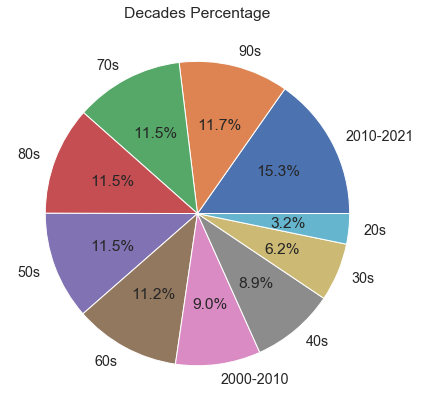

In [39]:
values= [26628, 20328, 20118, 20074, 20000, 19610, 15743, 15493, 10764, 5631]
my_labels=['2010-2021', '90s', '70s', '80s', '50s', '60s', '2000-2010', '40s','30s', '20s']
plt.pie(values,labels=my_labels, autopct='%1.1f%%')
plt.title('Decades Percentage')
plt.show()

#### The largest percent of tracks are released between 2010-2021, 15.3% of the given tracks released in this period, and the least released tracks were in 20s period 

## Artists who have the largest number of tracks 

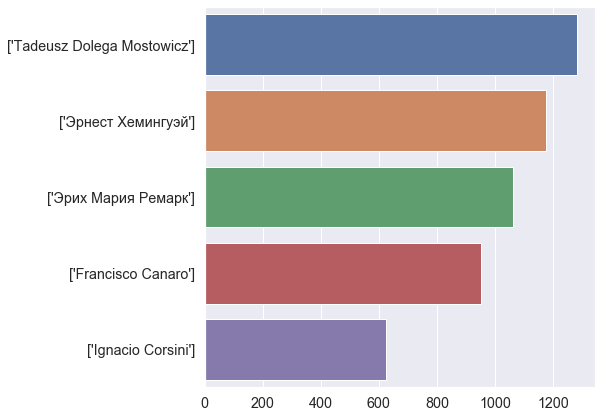

In [40]:
Values=df['artists'].value_counts().head(5).values
Artist=df['artists'].value_counts().head(5).index
sns.barplot(x=Values, y=Artist, data=df)

#### The largest number of tracks posted by one artist is 1281 track

In [41]:
artsit_name=df['artists'].value_counts().head(5).index
for artist in artsit_name:
    print(df[df['artists']== artist ].popularity.value_counts()) 

low popularity    1281
Name: popularity, dtype: int64
low popularity    1175
Name: popularity, dtype: int64
low popularity    1062
Name: popularity, dtype: int64
low popularity    951
Name: popularity, dtype: int64
low popularity    624
Name: popularity, dtype: int64


#### It's obvious that the number of tracks published by an artist is not an indicator to their popularity. which mean that an artist can have a lot of tracks published on spotify but non of these are popular

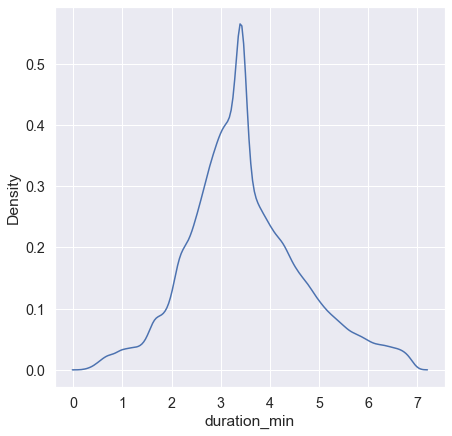

In [42]:
sns.kdeplot(df['duration_min'], shade=False)

#### Duration of the tracks lies between 0 to 7 mins

## Artists who have the most popular tracks

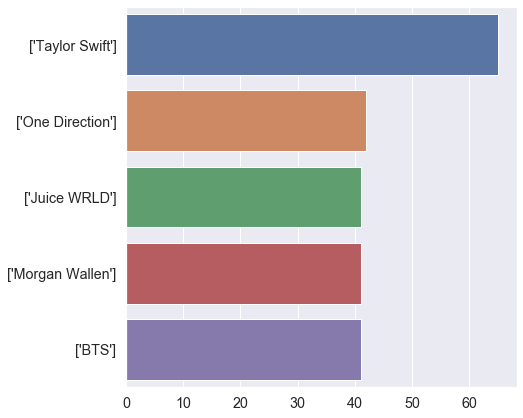

In [43]:
popular_artists=df[df['popularity']== 'high popularity' ].artists.value_counts().head(5).index
val=df[df['popularity']== 'high popularity' ].artists.value_counts().head(5).values
sns.barplot(x=val, y=popular_artists, data=df)

In [44]:
for artist in  popular_artists:
    x=(df[(df['popularity']== 'high popularity') & (df['artists']==artist)].shape[0])
    print("{} has {} highly popular songs".format(artist,x))

['Taylor Swift'] has 65 highly popular songs
['One Direction'] has 42 highly popular songs
['Juice WRLD'] has 41 highly popular songs
['Morgan Wallen'] has 41 highly popular songs
['BTS'] has 41 highly popular songs


## How some features changed over decades

## 1)Valence

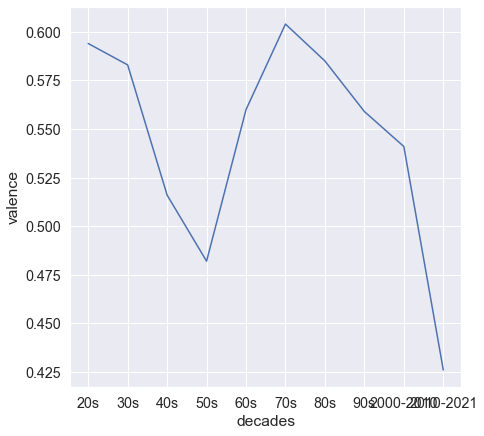

In [45]:
decades_ordered=["20s", "30s", "40s", "50s", "60s",  "70s",  "80s", "90s",  "2000-2010", "2010-2021"]
df['decades'] = pd.Categorical(df['decades'], categories=decades_ordered, ordered=True)
sns.lineplot(x='decades', y='valence', data=df, ci=None, estimator=np.median)

### The median of tracks positivity was high in 20s and decreased till it reached it's minimum at 50s and increased at 60s till it reached it's maxmium at 70 and decreased again after that

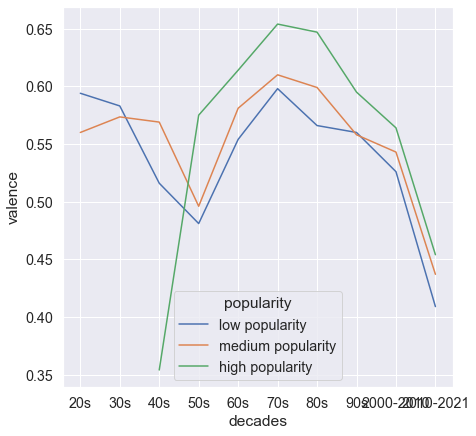

In [46]:
sns.lineplot(x='decades', y='valence', data=df, ci=None, estimator=np.median, hue='popularity')

## 2) Duration

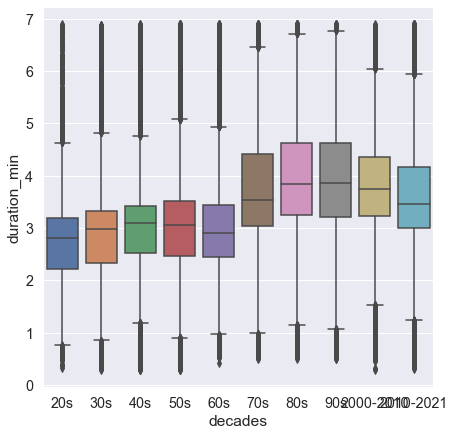

In [47]:
sns.boxplot(x='decades', y='duration_min', data=df)

### The duration ranges are widest in 70s, 80s and 90s with the highest median value of the track duration in 80s and 90s (3.85 min). 

## 3) Danceability

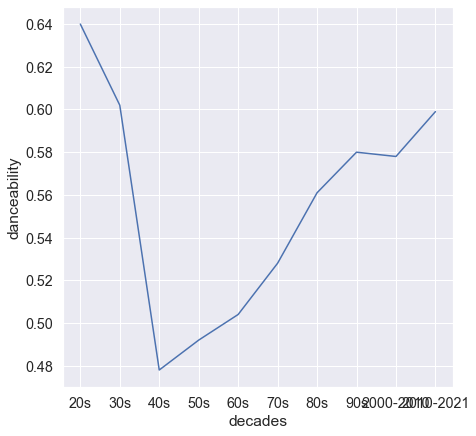

In [48]:
sns.lineplot(x='decades', y='danceability', data=df, ci=None, estimator=np.median)

### The danceabilty median was highest in 20s and then it started to decrease till it reached the lowest median value at 40s and then it started to increase again 

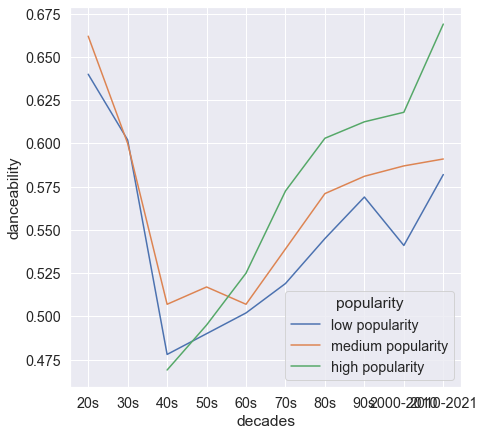

In [49]:
sns.lineplot(x='decades', y='danceability', data=df, ci=None, estimator=np.median, hue='popularity')

## 4) Loudness

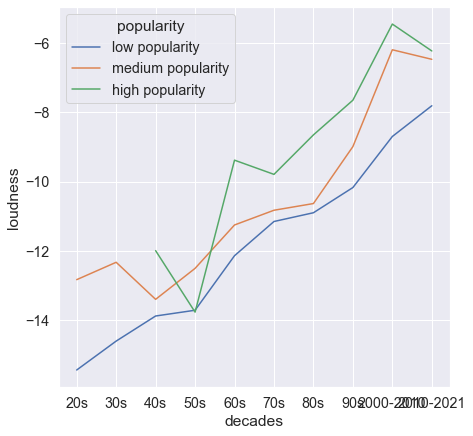

In [50]:
sns.lineplot(x='decades', y='loudness', data=df, ci=None, estimator=np.median, hue='popularity')

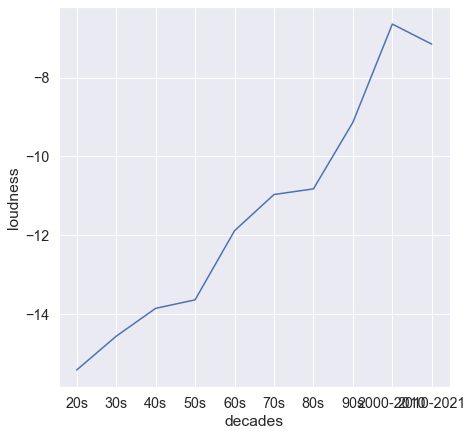

In [51]:
sns.lineplot(x='decades', y='loudness', data=df, ci=None, estimator=np.median)

### over decades the loudness is increasing, and it decreased a bit in the last decade

## 5) Energy

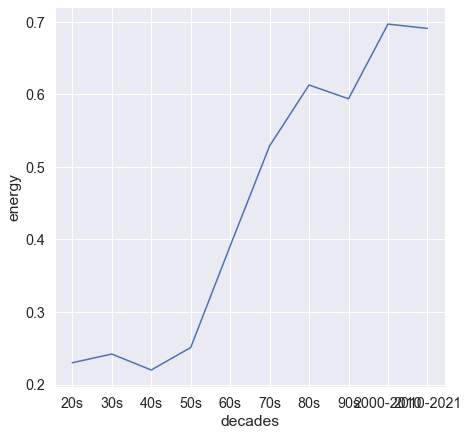

In [52]:
sns.lineplot(x='decades', y='energy', data=df, ci=None, estimator=np.median)

### Energy of the tracks are increasing over decades

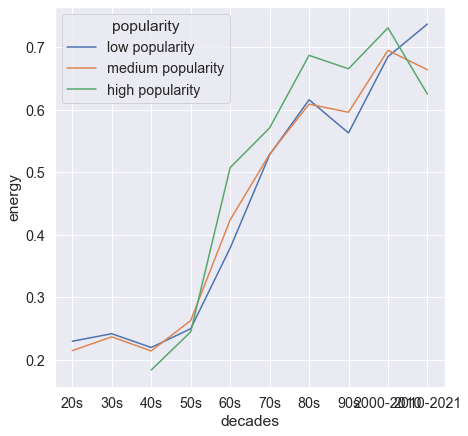

In [53]:
sns.lineplot(x='decades', y='energy', data=df, ci=None, estimator=np.median, hue='popularity')

## 6) Liveness

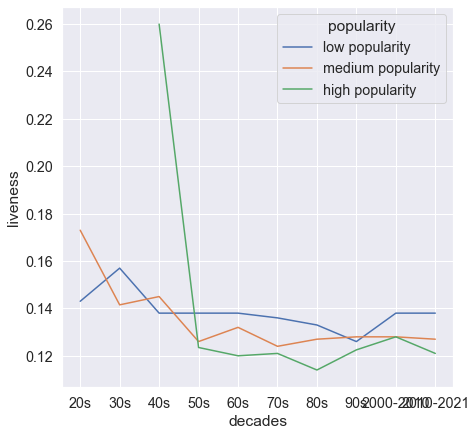

In [54]:
sns.lineplot(x='decades', y='liveness', data=df, ci=None, estimator=np.median, hue='popularity')

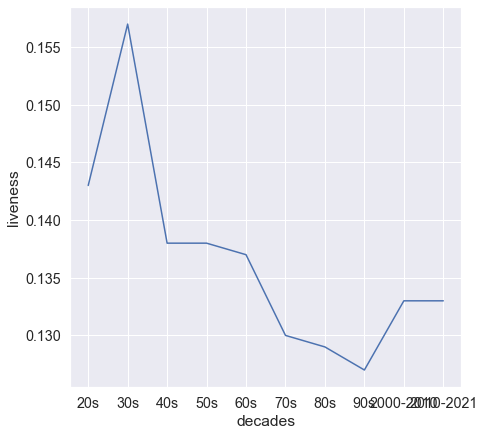

In [55]:
sns.lineplot(x='decades', y='liveness', data=df, ci=None, estimator=np.median)

### probability that the track was performed live is decreasing over time. the median value of tracks' liveness was highest in 30s, but within all decades the median liveness probability is low which indicaes that most of the tracks have no audience

## 7) Tempo

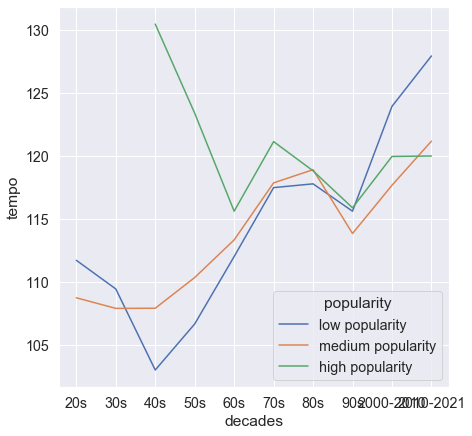

In [56]:
sns.lineplot(x='decades', y='tempo', data=df, ci=None, estimator=np.median, hue='popularity')

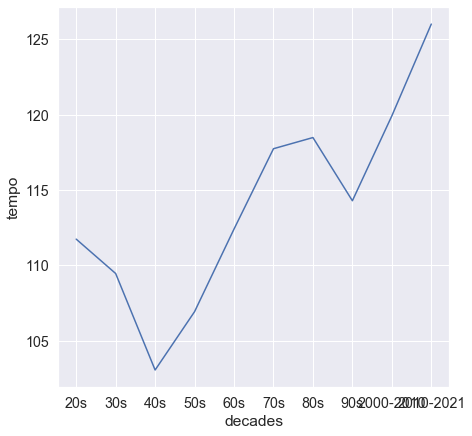

In [57]:
sns.lineplot(x='decades', y='tempo', data=df, ci=None, estimator=np.median)

### Before 40s the tempo was decreasing and after 40s the tempo was increasing till 80s and declined in 90s and increased in the last 2 decades

___

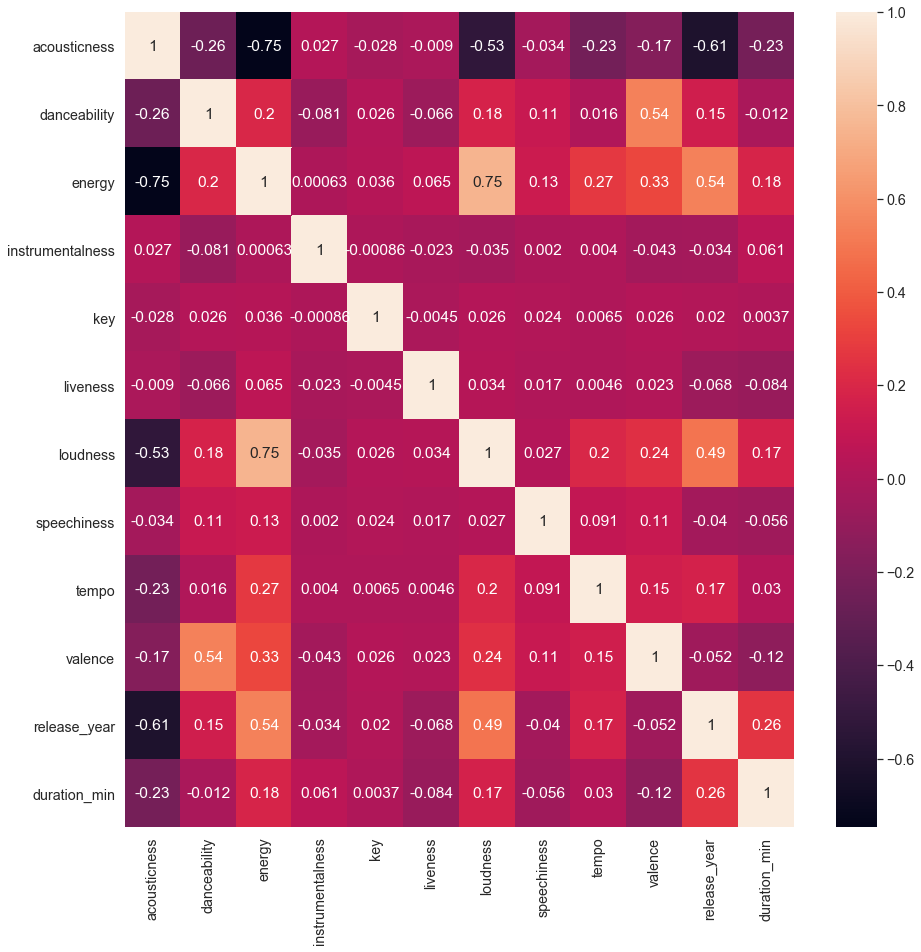

In [395]:
sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.3)

There is a strong positive linear relationshio between loudness and energy <br>
There is a moderate positive relationship between release_year and energy <br>
There is a strong negative relationship between (release_year, energy) and acousticness <br>
There is a moderate negative relationship between loudness and acousticness <br>

___

## Relationship Between Audio Features & Popularity

## 1) Explicit content

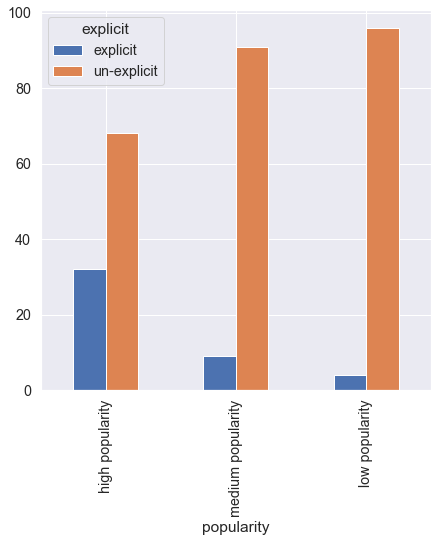

In [58]:
df['popularity'] = pd.Categorical(df['popularity'], categories=['high popularity', 'medium popularity', 'low popularity'], ordered=True)
(pd.crosstab(df['popularity'], df['explicit'], normalize='index').round(2)*100).plot.bar()

### The highest percentage of explicit content is among the highly popular tracks. about 30% of the highly popular tracks have explicit contents. and as the popularity decrease the percentage of explicit content is decreasing

## 2) Mode

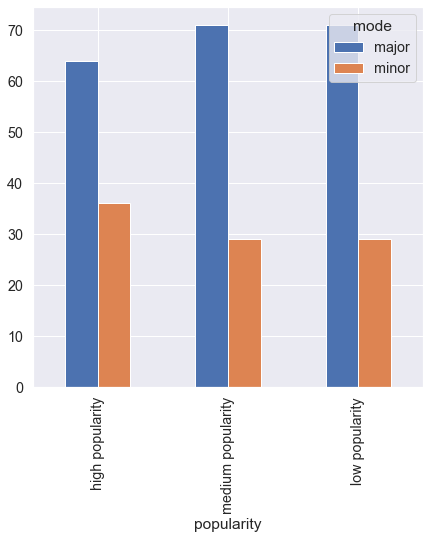

In [59]:
(pd.crosstab(df['popularity'], df['mode'], normalize='index').round(2)*100).plot.bar()

### around 62% of the highly popular songs are major 38% minors. while both medium popularity and low popularity songs have the same percentage of modality

## 2) key

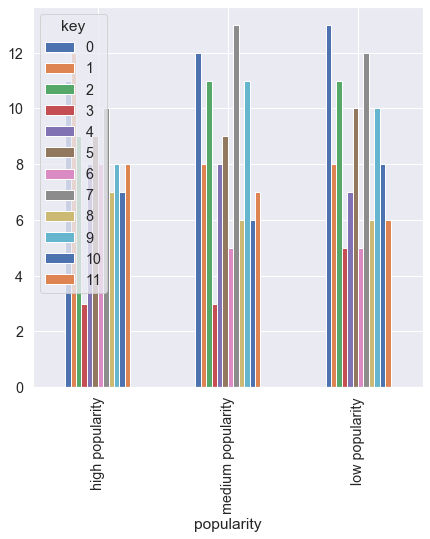

In [60]:
(pd.crosstab(df['popularity'], df['key'], normalize='index').round(2)*100).plot.bar()
sns.set(rc={'figure.figsize': [11, 11]}, font_scale=1.3)

### Amoung the highly popular tracks key 1 is the most used key. in the medium popularity tracks key 7 is the most used key and key 0 is the most used key in the low popularity tracks, given that key 3 is the least used key in all categories

## 3) Danceability

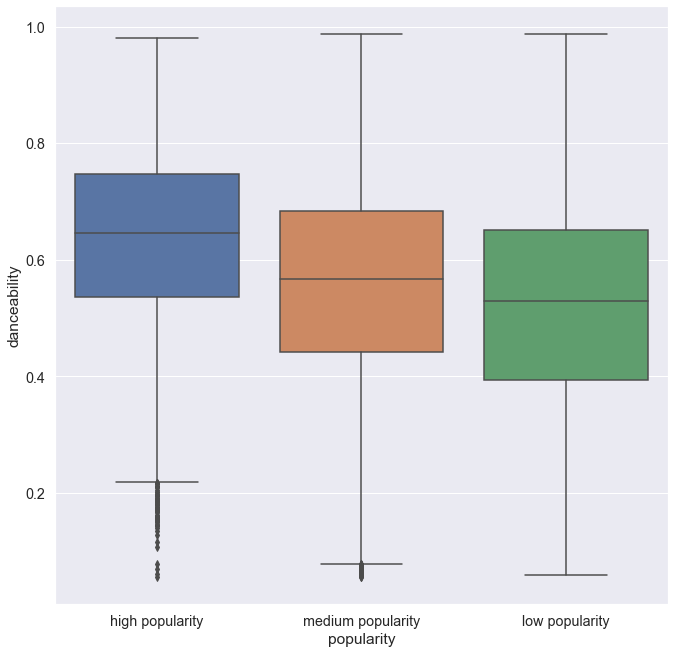

In [61]:
sns.boxplot(y=df['danceability'], x=df['popularity'])
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.3)

### It's obvious that the highly popular tracks have higher danceability median. 

## 4) acousticness

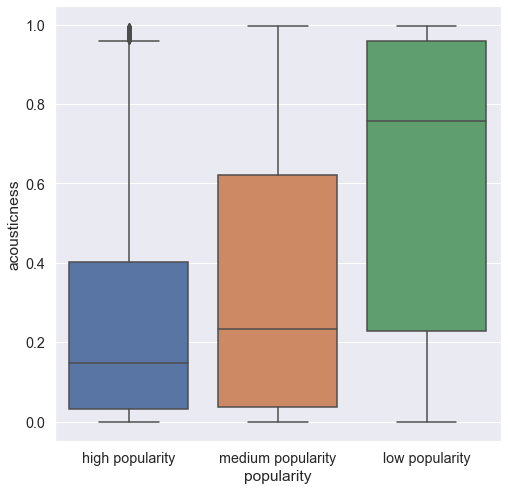

In [62]:
sns.boxplot(y=df['acousticness'], x=df['popularity'])

### The highe the popularity the lower the acousticness median value and the lower the ranges of acousticness are. also it seems that the distrbution for the 3 categories of popularity are skewed. the high and medium popularity are skewed to the right and the low popularity is skewed to the left

## 4) Valence

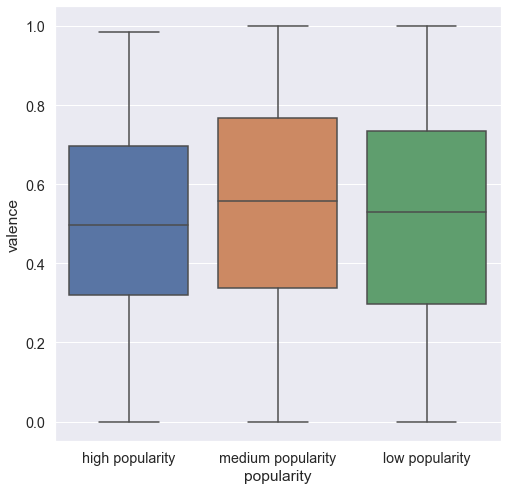

In [63]:
sns.boxplot(y=df['valence'], x=df['popularity'])

### The most popular tracks have the least valence median and range . But the valence median doesn't vary much acrros different popularity categories

## 5) Tempo

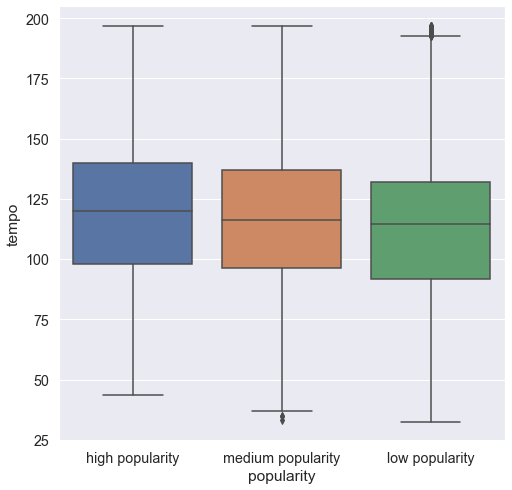

In [64]:
sns.boxplot(y=df['tempo'], x=df['popularity'])

### The highly popular tracks have higher ranges of tempo and higher median values.

## 5) Liveness

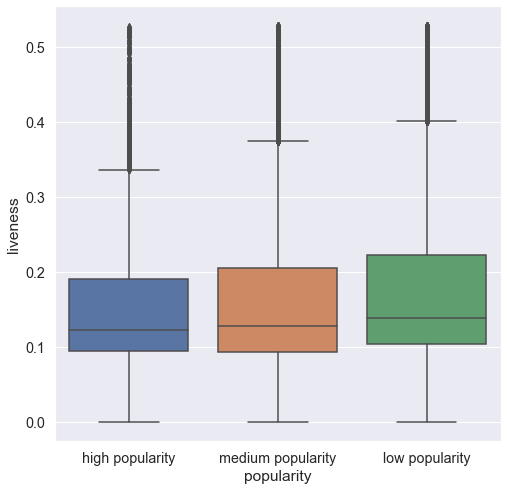

In [65]:
sns.boxplot(y=df['liveness'], x=df['popularity'])

### The liveness of track value doesn't vary much accross each popularity category. all the categories are skewed to the right. however the highly popular tracks seems to have lower probabilty.  which mean that the tracks doesn't include audience

## 6) Energy

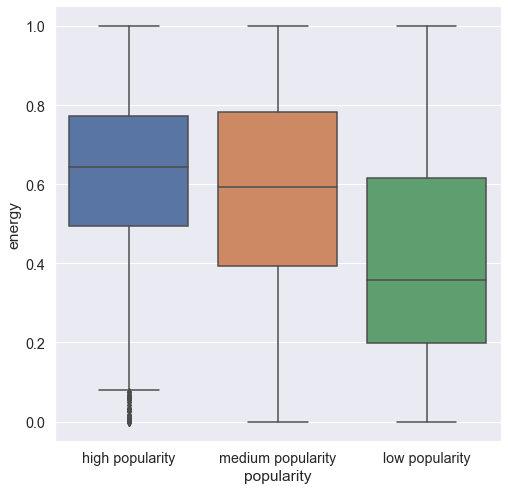

In [66]:
sns.boxplot(x='popularity', y='energy' ,data=df)

### The higher the energy the higher the popularity of the track. it's obvious that the median value of the energy for the highly popular tracks are much larger than the low popular tracks

## 7) Decades

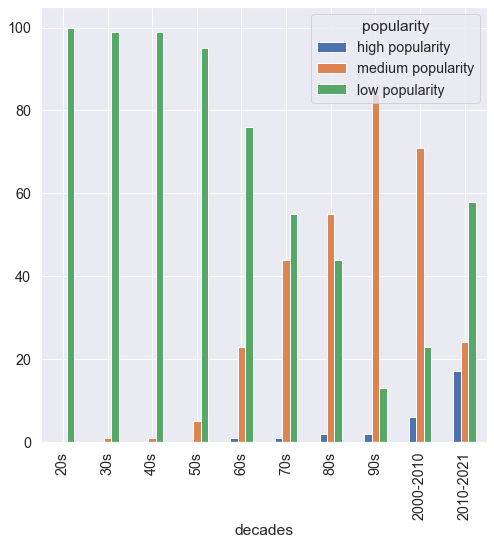

In [67]:
df['decades'] = pd.Categorical(df['decades'], categories=decades_ordered, ordered=True)
(pd.crosstab(df['decades'], df['popularity'], normalize='index').round(2)*100).plot.bar()

### Percentage of highly popular songs increase in later decades. 

## 8) Duration in minutes

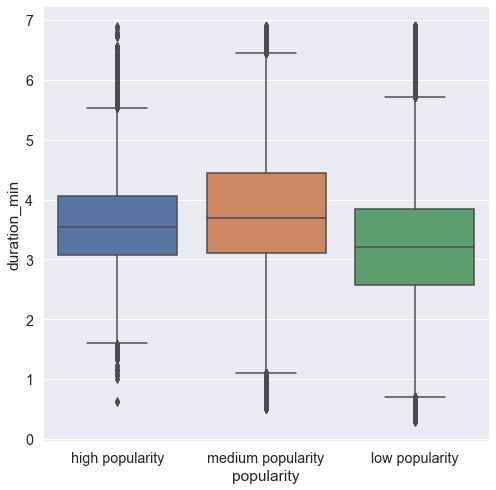

In [68]:
sns.boxplot(x='popularity', y='duration_min' ,data=df)

### The duration of most of the highly popular tracks ranges between 3 and 4 mins while the medium popular tracks ranges from 3.2 to 4.5 mins and the leaset popular ranges between 2.7 to 4. so it seems that people mostly prefer medium duration

## 9) Loudness

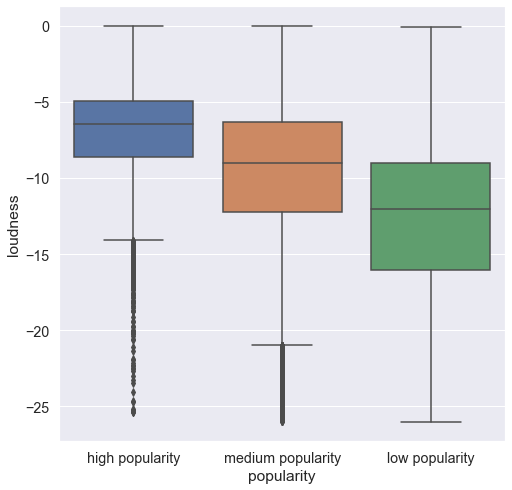

In [69]:
sns.boxplot(x='popularity', y='loudness' ,data=df)

### The highly popular tracks are louder than other tracks 


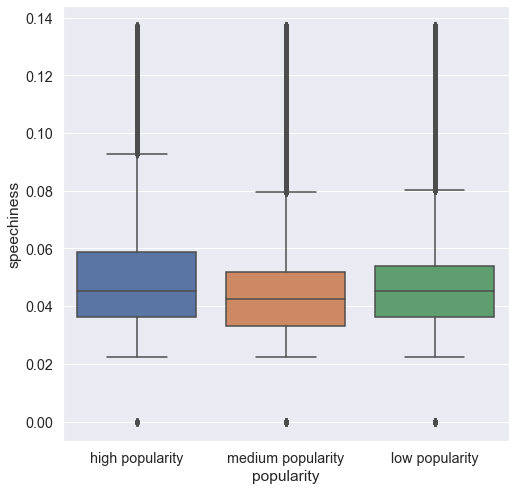

In [70]:
sns.boxplot(x='popularity', y='speechiness' ,data=df)

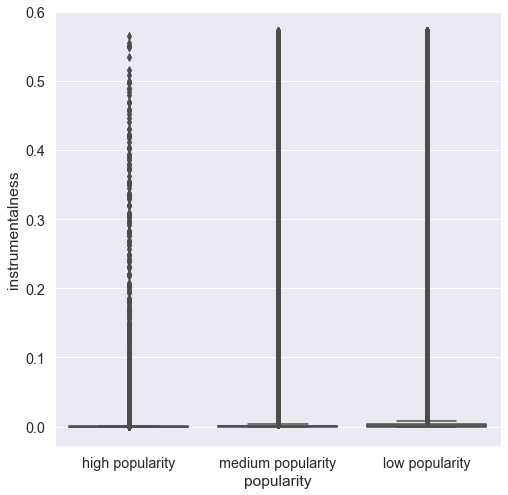

In [71]:
sns.boxplot(x='popularity', y='instrumentalness' ,data=df)

#### Both speechiness and instrumentless seem to be insignificant variable so they will be dropped from the model 

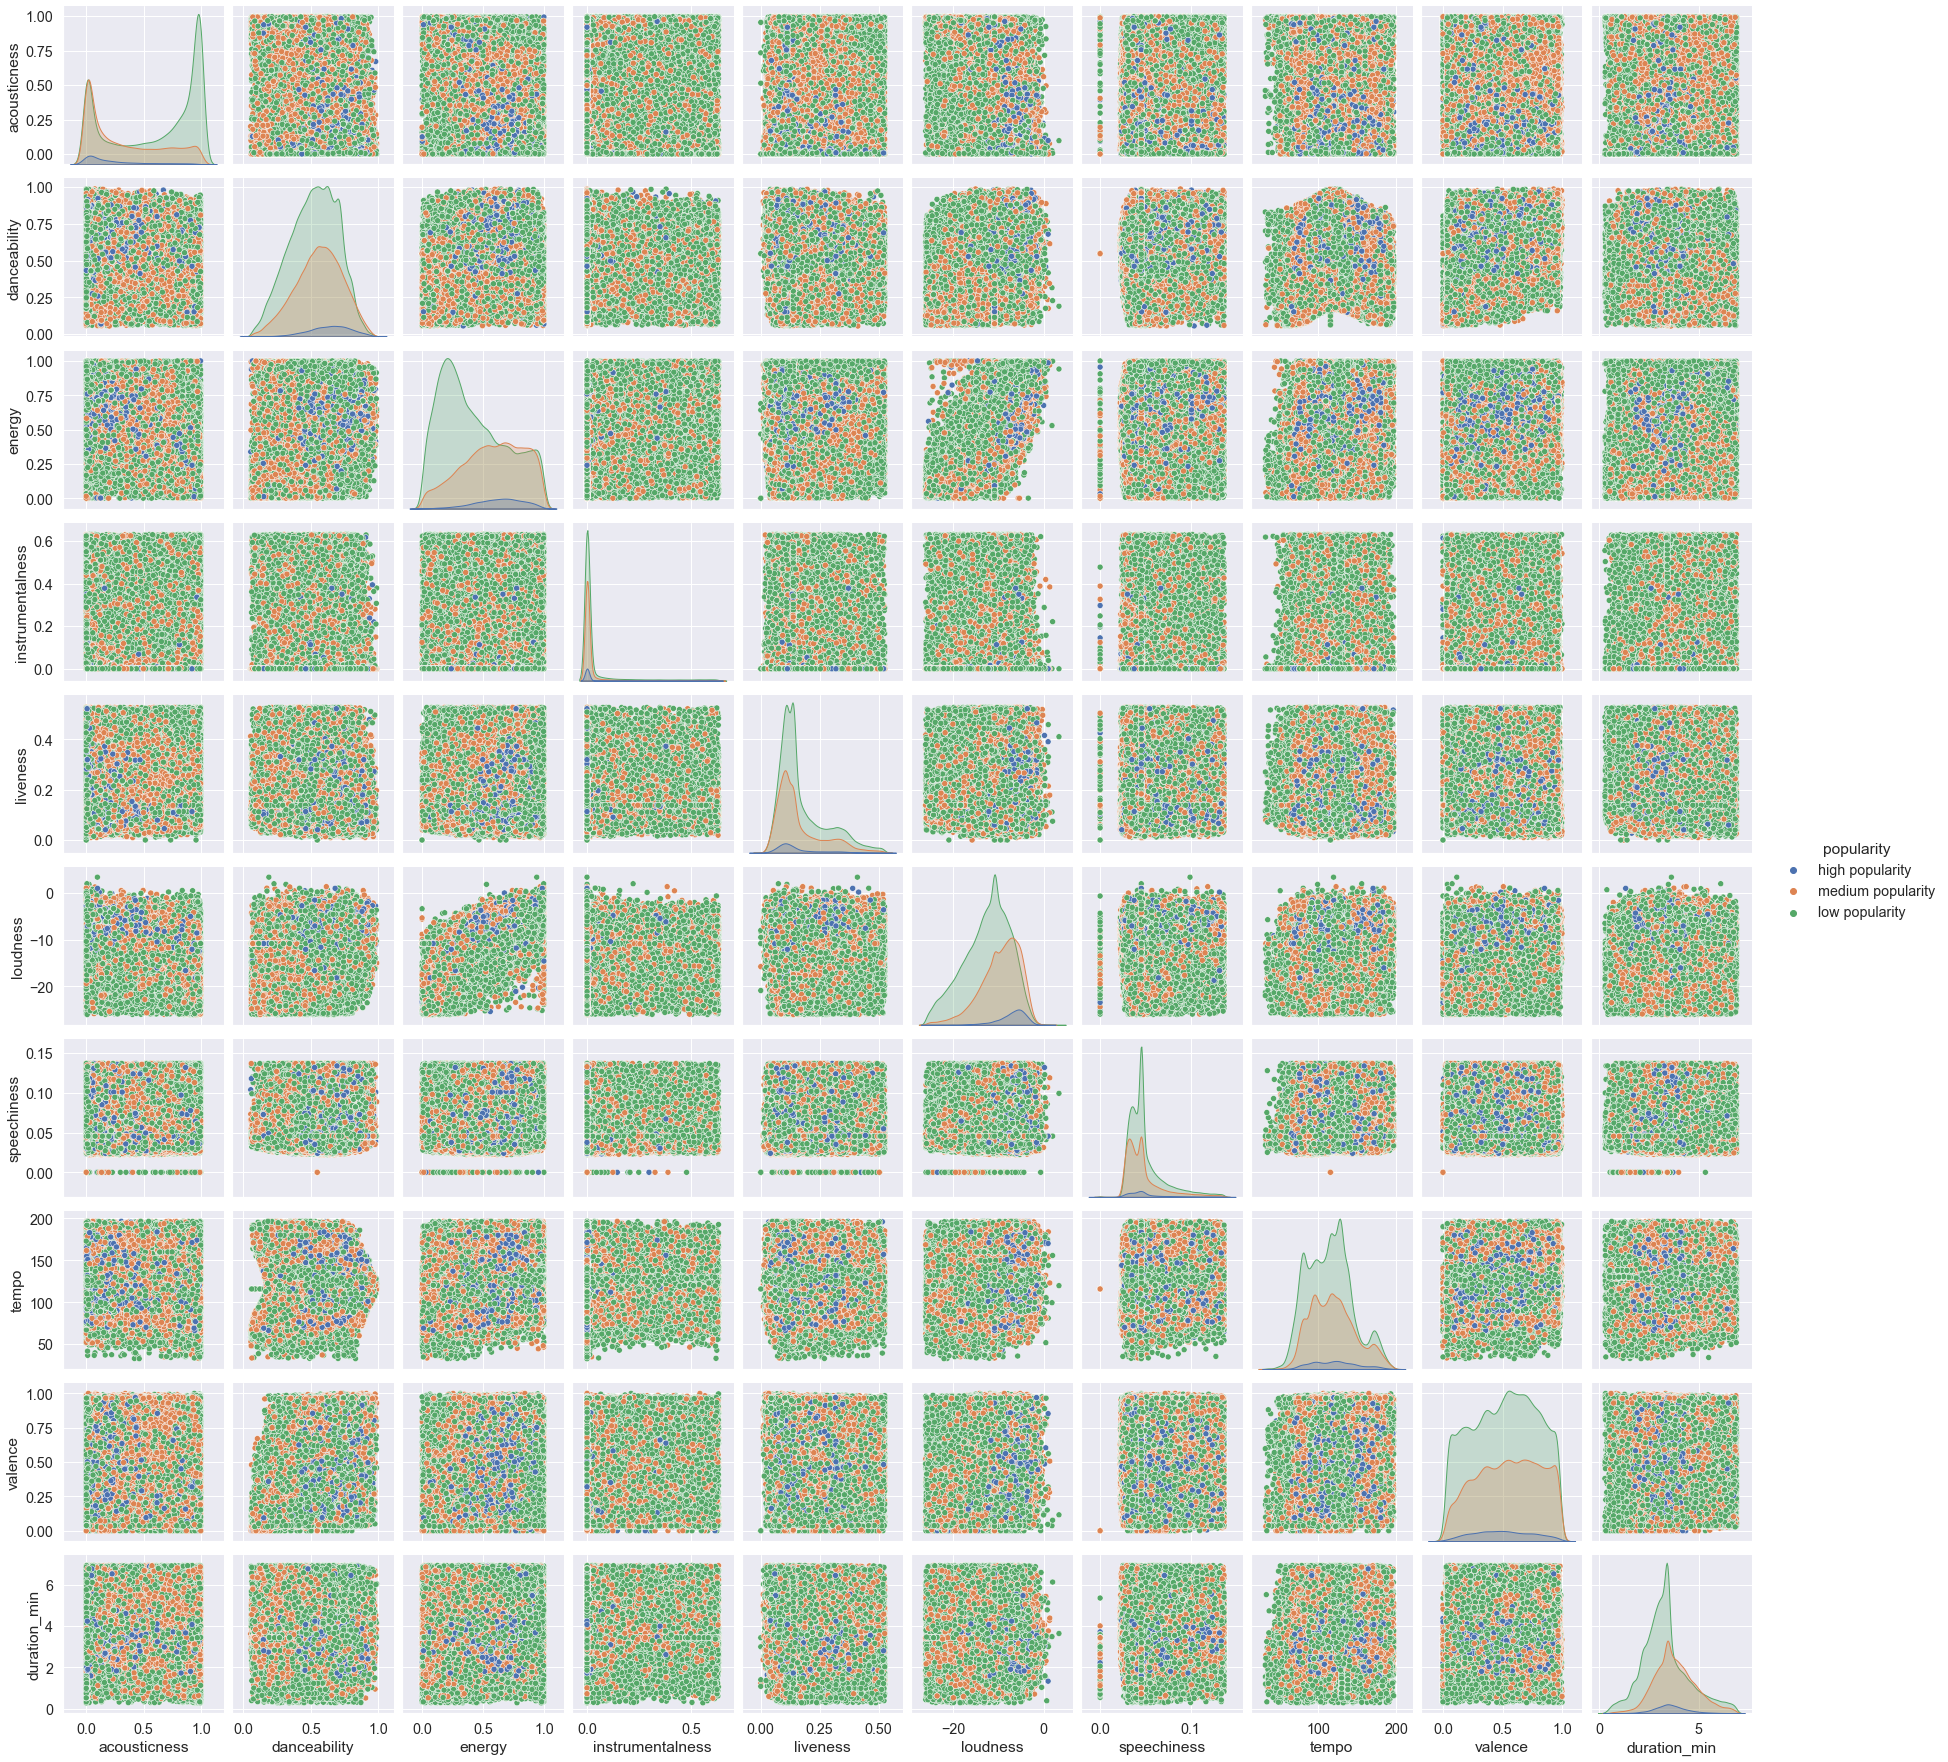

In [115]:
sns.pairplot(df, vars=['acousticness', 'danceability', 'energy', 
       'instrumentalness' ,'liveness', 'loudness',
        'speechiness', 'tempo', 'valence', 
       'duration_min'], hue='popularity')

# Data Preprocessing 

In [72]:
def ext_pop(x):
    if x=='low popularity':
        return 0
    elif x=='medium popularity':
        return 1
    else:
        return 2

In [73]:
df['track_popularity']=df['popularity'].apply(ext_pop)

In [74]:
df['track_popularity'].value_counts().index

CategoricalIndex([0, 1, 2], categories=[2, 1, 0], ordered=True, dtype='category')

In [75]:
x=df.drop(['popularity','artists','name','decades','track_popularity','instrumentalness','speechiness','mode'] ,axis=1)

In [76]:
y=df['track_popularity']

In [77]:
y.unique()

[0, 1, 2]
Categories (3, int64): [2 < 1 < 0]

In [78]:
x

acousticness  danceability  energy     explicit  key  liveness  \
0           0.991000         0.598  0.2240  un-explicit    5    0.3790   
1           0.643000         0.852  0.5170  un-explicit    5    0.0809   
2           0.993000         0.647  0.1860  un-explicit    0    0.5190   
3           0.000173         0.730  0.7980  un-explicit    2    0.1280   
4           0.295000         0.704  0.7070     explicit   10    0.4020   
...              ...           ...     ...          ...  ...       ...   
169853      0.995000         0.297  0.0287  un-explicit    8    0.0995   
169854      0.995000         0.343  0.0165  un-explicit    9    0.0774   
169855      0.988000         0.316  0.0573  un-explicit    3    0.1200   
169856      0.795000         0.429  0.2110  un-explicit    4    0.1960   
169857      0.920000         0.462  0.2400     explicit    0    0.1130   

        loudness    tempo  valence  release_year  duration_min  
0        -12.628  149.976   0.6340          1920      2.805550  
1         -7.261   86.889   0.9500          1920      2.503333  
2        -12.098   97.600   0.6890          1920      2.730450  
3         -7.311  127.997   0.0422          1920      3.423783  
4         -6.036  122.076   0.2990          1920      2.753733  
...          ...      ...      ...           ...           ...  
169853   -10.887  141.636   0.0678          2021      5.820000  
169854   -10.887  126.970   0.1510          2021      3.445000  
169855   -24.121   81.070   0.0373          2021      5.055550  
169856   -11.665   94.710   0.2280          2021      2.412000  
169857   -12.077  171.319   0.3200          2021      4.066667  

[169858 rows x 11 columns]

### Get dummies

In [79]:
x=pd.get_dummies(x,columns=['key','explicit'],drop_first=True)

In [80]:
x.columns

Index(['acousticness', 'danceability', 'energy', 'liveness', 'loudness',
       'tempo', 'valence', 'release_year', 'duration_min', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'explicit_un-explicit'],
      dtype='object')

In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169858 entries, 0 to 169857
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   acousticness          169858 non-null  float64
 1   danceability          169858 non-null  float64
 2   energy                169858 non-null  float64
 3   liveness              169858 non-null  float64
 4   loudness              169858 non-null  float64
 5   tempo                 169858 non-null  float64
 6   valence               169858 non-null  float64
 7   release_year          169858 non-null  int64  
 8   duration_min          169858 non-null  float64
 9   key_1                 169858 non-null  uint8  
 10  key_2                 169858 non-null  uint8  
 11  key_3                 169858 non-null  uint8  
 12  key_4                 169858 non-null  uint8  
 13  key_5                 169858 non-null  uint8  
 14  key_6                 169858 non-null  uint8  
 15  

### Feature Scaling

In [83]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.28828155,  0.35076506, -0.94408072, ..., -0.27700881,
        -0.2590782 ,  0.27046044],
       [ 0.36982511,  1.80201968,  0.13532189, ..., -0.27700881,
        -0.2590782 ,  0.27046044],
       [ 1.29356004,  0.6307315 , -1.0840715 , ..., -0.27700881,
        -0.2590782 ,  0.27046044],
       ...,
       [ 1.28036382, -1.26047038, -1.55819817, ..., -0.27700881,
        -0.2590782 ,  0.27046044],
       [ 0.77098999, -0.61483348, -0.9919723 , ..., -0.27700881,
        -0.2590782 ,  0.27046044],
       [ 1.10089532, -0.42628465, -0.88513723, ..., -0.27700881,
        -0.2590782 , -3.69739839]])

In [84]:
x=pd.DataFrame(data=x, columns=['acousticness', 'danceability', 'energy', 'liveness', 'loudness',
       'tempo', 'valence', 'release_year', 'duration_min', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'explicit_un-explicit'])
x

acousticness  danceability    energy  liveness  loudness     tempo  \
0           1.288282      0.350765 -0.944081  2.039977 -0.237520  1.170731   
1           0.369825      1.802020  0.135322 -0.860131  0.826695 -1.013757   
2           1.293560      0.630732 -1.084072  3.401987 -0.132427 -0.642872   
3          -1.326751      1.104960  1.170517 -0.401912  0.816780  0.409673   
4          -0.548631      0.956407  0.835276  2.263736  1.069598  0.204649   
...              ...           ...       ...       ...       ...       ...   
169853      1.298839     -1.369029 -1.663560 -0.679179  0.107700  0.881945   
169854      1.298839     -1.106203 -1.708504 -0.894182  0.107700  0.374111   
169855      1.280364     -1.260470 -1.558198 -0.479742 -2.516451 -1.215250   
169856      0.770990     -0.614833 -0.991972  0.259635 -0.046568 -0.742943   
169857      1.100895     -0.426285 -0.885137 -0.547842 -0.128263  1.909766   

         valence  release_year  duration_min     key_1  ...     key_3  \
0       0.408294     -2.124362     -0.595837 -0.289894  ... -0.209398   
1       1.604387     -2.124362     -0.858169 -0.289894  ... -0.209398   
2       0.616474     -2.124362     -0.661026 -0.289894  ... -0.209398   
3      -1.831732     -2.124362     -0.059193 -0.289894  ... -0.209398   
4      -0.859717     -2.124362     -0.640815 -0.289894  ... -0.209398   
...          ...           ...           ...       ...  ...       ...   
169853 -1.734833      1.674050      2.020792 -0.289894  ... -0.209398   
169854 -1.419912      1.674050     -0.040776 -0.289894  ... -0.209398   
169855 -1.850279      1.674050      1.357228 -0.289894  ...  4.775595   
169856 -1.128459      1.674050     -0.937449 -0.289894  ... -0.209398   
169857 -0.780229      1.674050      0.498849 -0.289894  ... -0.209398   

           key_4     key_5     key_6     key_7     key_8     key_9    key_10  \
0      -0.286912  3.078627 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   
1      -0.286912  3.078627 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   
2      -0.286912 -0.324820 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   
3      -0.286912 -0.324820 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   
4      -0.286912 -0.324820 -0.235509 -0.374168 -0.255567 -0.339958  3.609993   
...          ...       ...       ...       ...       ...       ...       ...   
169853 -0.286912 -0.324820 -0.235509 -0.374168  3.912869 -0.339958 -0.277009   
169854 -0.286912 -0.324820 -0.235509 -0.374168 -0.255567  2.941542 -0.277009   
169855 -0.286912 -0.324820 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   
169856  3.485387 -0.324820 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   
169857 -0.286912 -0.324820 -0.235509 -0.374168 -0.255567 -0.339958 -0.277009   

          key_11  explicit_un-explicit  
0      -0.259078              0.270460  
1      -0.259078              0.270460  
2      -0.259078              0.270460  
3      -0.259078              0.270460  
4      -0.259078             -3.697398  
...          ...                   ...  
169853 -0.259078              0.270460  
169854 -0.259078              0.270460  
169855 -0.259078              0.270460  
169856 -0.259078              0.270460  
169857 -0.259078             -3.697398  

[169858 rows x 21 columns]

### Imbalanced Classes

In [85]:
y.value_counts()

0    104460
1     59164
2      6234
Name: track_popularity, dtype: int64

In [86]:
sampler=SMOTE()
x,y=sampler.fit_resample(x,y)
y.value_counts()

0    104460
1    104460
2    104460
Name: track_popularity, dtype: int64

In [87]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb= XGBClassifier()

# Model Selection & Fitting

### Decision Tree

In [451]:
dt_cv=cross_validate(dt,x,y,cv=10,n_jobs=-1,scoring='accuracy',return_train_score=True)
dt_cv

{'fit_time': array([10.59946942, 11.49482179, 10.56456113, 11.37900329, 11.4188509 ,
        10.53663635, 10.90718794, 10.79863811,  5.68877554,  5.62471342]),
 'score_time': array([0.03091741, 0.03590488, 0.03690124, 0.02905202, 0.04388309,
        0.02792525, 0.04388428, 0.03570223, 0.01518798, 0.01514959]),
 'test_score': array([0.72116919, 0.82123939, 0.84169379, 0.82120748, 0.79960431,
        0.79306274, 0.790127  , 0.77997958, 0.77576744, 0.77015125]),
 'train_score': array([0.99899306, 0.99849668, 0.99820949, 0.99813858, 0.99817758,
        0.99823431, 0.99815985, 0.99808539, 0.99802866, 0.9980003 ])}

In [50]:
dt_cv['test_score'].mean()

0.7902674069819389

In [52]:
dt_cv['train_score'].mean()

0.9982612518702888

In [452]:
y_pred=cross_val_predict(dt,x,y,cv=10,n_jobs=-1)
accuracy_score(y,y_pred)

0.7901525304741847

### XG Boost

In [453]:
xgb_cv=cross_validate(xgb,x,y,cv=10,n_jobs=-1,scoring='accuracy',return_train_score=True)
xgb_cv

{'fit_time': array([335.33002114, 335.62952948, 336.23793697, 334.25647473,
        336.6050415 , 331.68005204, 332.07018018, 334.20768285,
         81.27148914,  79.83821058]),
 'score_time': array([0.1225121 , 0.12904   , 0.22601008, 0.10919785, 0.17551994,
        0.10105801, 0.15342188, 0.13084364, 0.05001044, 0.07906723]),
 'test_score': array([0.71041547, 0.82902546, 0.8763482 , 0.84373604, 0.79714723,
        0.77701193, 0.75528113, 0.74277235, 0.73980471, 0.73141234]),
 'train_score': array([0.82029627, 0.80831933, 0.80551478, 0.80719893, 0.81068422,
        0.81223009, 0.81581821, 0.81728253, 0.81851285, 0.81860148])}

In [454]:
xgb_cv['test_score'].mean()

0.7802954879060566

In [455]:
xgb_cv['train_score'].mean()

0.8134458697640777

In [456]:
y_pred=cross_val_predict(xgb,x,y,cv=10,n_jobs=-1)
accuracy_score(y,y_pred)

0.7802954879060565

### Random Forest

In [100]:
rf_cv=cross_validate(rf,x,y,cv=10,n_jobs=-1,scoring='accuracy',return_train_score=True)
rf_cv

{'fit_time': array([198.27304006, 199.33220863, 198.17231131, 197.33754063,
        197.83720589, 196.52870488, 195.38974619, 192.53039312,
         89.7341311 ,  89.20155406]),
 'score_time': array([7.44809127, 8.50526428, 8.70373297, 8.33572698, 8.4424324 ,
        6.27422667, 6.26325798, 7.66750145, 1.14796162, 1.11202598]),
 'test_score': array([0.8052205 , 0.89610058, 0.92839364, 0.8990044 , 0.85784032,
        0.84261918, 0.84587402, 0.83429064, 0.82940839, 0.81629332]),
 'train_score': array([0.99899306, 0.99849668, 0.99820594, 0.99813858, 0.99817758,
        0.99823076, 0.99815985, 0.99808539, 0.99802866, 0.9980003 ])}

In [101]:
rf_cv['test_score'].mean()

0.8555044993298871

In [102]:
rf_cv['train_score'].mean()

0.998251678827976

In [103]:
y_pred=cross_val_predict(rf,x,y,cv=10,n_jobs=-1)
accuracy_score(y,y_pred)

0.8559129491352352

In [105]:
model=RandomForestClassifier()

In [106]:
model.fit(x,y)

RandomForestClassifier()

In [104]:
data=[0.92,0.462,0.24,0.113,-12.077,171.319,0.32,2021,4.06]+[0,0,0,0,0,0,0,0,0,0,0]+[0]
data=scaler.transform([data])
pred=model.predict(data)
pred[0]

C:\Myanaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Myanaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


2

In [104]:
x.columns

Index(['acousticness', 'danceability', 'energy', 'liveness', 'loudness',
       'tempo', 'valence', 'release_year', 'duration_min', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'explicit_un-explicit'],
      dtype='object')

## Hyper parameter tuning

In [91]:
params1= [
        {'criterion':['gini', 'entropy'], 'n_estimators':[20, 50, 100, 150,300, 200, 500]}
         ]

In [92]:
Rand_cv=RandomizedSearchCV(estimator=rf,param_distributions=params1,cv=5,n_jobs=-1,scoring='accuracy')

In [93]:
Rand_cv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'n_estimators': [20, 50, 100, 150, 300,
                                                          200, 500]}],
                   scoring='accuracy')

In [94]:
Rand_cv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'n_estimators': [20, 50, 100, 150, 300,
                                                          200, 500]}],
                   scoring='accuracy')

In [95]:
Rand_cv.best_params_

{'n_estimators': 300, 'criterion': 'entropy'}

In [96]:
Rand_cv.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [97]:
model=Rand_cv.best_estimator_

In [99]:
model.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [108]:
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'features.h5')

['features.h5']

# Conclusion 

**From the descripitive analaysis of the given data it's found that**<br> 1- the more popular tracks have higher danceability, energy, tempo and usually played in key 1"C#/Db'<br> 2- have lower liveness, valence, acqustiness<br> 3- medium duration between 3 to 4 mins.<br> 4- It also it seemes that speechiness and instrumentless don't affect the popularity in a significant way so they were excluded from the predictive model <br> 5- The number of tracks per artist is not an indicator that their tracks will be popular <br> 6- Taylor Swift is the artist with highest number of tracks with popularity above 66( it's recommended to have a look on the tracks of the 5 artists with the highest number of popular tracks) <br>